# 1조 - Drug Classifier

#### 1.라이브러리 import하기

In [1]:
#기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#전처리부분
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#모델부분
from sklearn import naive_bayes, svm
from sklearn.neighbors import KNeighborsClassifier
#검증부분 - Confusion_Matrix / Preciion and Reall 
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score
#검증부분 - Cross Validation
from sklearn.model_selection import cross_val_score #점수 나타내기

#### 2.엑셀파일 불러오기

In [2]:
#raw데이터를 훈련-테스트 데이터로 나눈후 , fitting해서 리턴
def data_transformer(xlsx_file):
    
    data = pd.read_excel(xlsx_file,encoding = 'utf-8')
    df = pd.DataFrame({'text':data['text'], 'label':data['label']})
    Train_X, Test_X, Train_Y, Test_Y = train_test_split(df['text'],df['label'],test_size=0.3, random_state = 1)
    
    Tfidf_vect = TfidfVectorizer(max_features = 100000)
    Tfidf_vect.fit(Train_X[:].values.astype('U'))

    Train_X_Tfidf = Tfidf_vect.transform(Train_X[:].values.astype('U'))
    Test_X_Tfidf = Tfidf_vect.transform(Test_X[:].values.astype('U'))

    Tfidf_vect = TfidfVectorizer(max_features = 100000)
    Tfidf_vect.fit(Train_X[:].values.astype('U'))

    Train_X_Tfidf = Tfidf_vect.transform(Train_X[:].values.astype('U'))
    Test_X_Tfidf = Tfidf_vect.transform(Test_X[:].values.astype('U'))
    
    return Train_X_Tfidf, Test_X_Tfidf, Train_Y, Test_Y

#### 3.데이터 생성

In [3]:
Train_X, Test_X, Train_Y, Test_Y = data_transformer("real4.xlsx")

# 4.SVM

#### 4-1.Learning SVM

In [4]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X,Train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 4-2.Cross Validation with SVM

In [5]:
svm_scores = cross_val_score(SVM,Train_X,Train_Y, cv=10)
print(svm_scores)

[0.99946323 0.99973162 0.99959742 0.99919485 0.99932895 0.99959737
 0.99959737 0.99906053 0.99919474 0.99973154]


#### 4-3.Predict Test Data using SVM

In [6]:
predictions_SVM = SVM.predict(Test_X)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  99.95929231250979


#### 4-4.Confusion Matrix_SVM

In [8]:
print(metrics.confusion_matrix(Test_Y,predictions_SVM))

[[30834     5]
 [    8  1088]]


#### 4-5.SVM_Score

In [9]:
print("Precision Score :" ,precision_score(Test_Y, predictions_SVM))
print("Recall Score : ",recall_score(Test_Y, predictions_SVM))
print("F1 Score : ",f1_score(Test_Y, predictions_SVM))

Precision Score : 0.9954254345837146
Recall Score :  0.9927007299270073
F1 Score :  0.9940612151667428


## 5.나이브 베이즈  
#### 5-1.Training Multinomial Naive Bayes Classifier

In [10]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X,Train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### 5-2 Cross Validation with  MNB

In [11]:
mnb_scores = cross_val_score(Naive,Train_X,Train_Y, cv=10)
print(mnb_scores)

[0.99906065 0.99892646 0.99906065 0.99919485 0.99879211 0.99932895
 0.99946316 0.9986579  0.99919474 0.99892617]


#### 5-3.Predict Test Data using MNB

In [12]:
predictions_NB = Naive.predict(Test_X)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  99.94050414905277


#### 5-4.Confusion Matrix_MNB

In [13]:
print(metrics.confusion_matrix(Test_Y,predictions_NB))

[[30835     4]
 [   15  1081]]


#### 5-5.MNB_Score

In [14]:
print("Precision Score :" ,precision_score(Test_Y, predictions_NB))
print("Recall Score : ",recall_score(Test_Y, predictions_NB))
print("F1 Score : ",f1_score(Test_Y, predictions_NB))

Precision Score : 0.9963133640552996
Recall Score :  0.9863138686131386
F1 Score :  0.9912883998165979


# 6.KNN

#### 6-1.Learning KNN

In [15]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(Train_X,Train_Y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

#### 6-2.Cross Validation with KNN

In [16]:
knn_scores = cross_val_score(knn_clf,Train_X,Train_Y, cv=10)
print(knn_scores)

[0.99691358 0.99610843 0.99624262 0.9966452  0.9973158  0.99798685
 0.9973158  0.99624212 0.99651054 0.99838926]


#### 6-3.Predict Test Data using KNN

In [17]:
y_pred = knn_clf.predict(Test_X)
np.mean(y_pred == Test_Y)

0.9979019884139658

#### 6-4.Confusion Matrix_KNN

In [18]:
print(metrics.confusion_matrix(Test_Y,y_pred))

[[30837     2]
 [   65  1031]]


#### 6-5.KNN_Score

In [19]:
print("Precision Score :" ,precision_score(Test_Y, y_pred))
print("Recall Score : ",recall_score(Test_Y, y_pred))
print("F1 Score : ",f1_score(Test_Y, y_pred))

Precision Score : 0.9980638915779284
Recall Score :  0.9406934306569343
F1 Score :  0.968529826209488


# 7.ROC_Curve

In [20]:
def plot_precision_recall_vs_threshold(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],"b--",label = "precision",linewidth = 2)
    plt.plot(threshold,recall[:-1],"g-",label = 'recall',linewidth = 2)
    plt.xlabel("threshold",fontsize = 16)
    plt.legend(loc = "upper left",fontsize = 16)
    plt.ylim([0,1])

In [21]:
def plot_precision_vs_recall(precision,recall):
    plt.plot(recall,precision,"b-",linewidth = 2)
    plt.xlabel("Recall",fontsize = 16)
    plt.ylabel("Precision",fontsize = 16)
    plt.axis([0,1,0,1])

In [22]:
def Draw_Roc_curve(model_name,X_train,Y_Train):
    Y_train_pred = cross_val_predict(model_name,X_train,Y_Train,cv = 10)
    precisions,recalls,thresholds = precision_recall_curve(Y_Train,Y_train_pred)
    plot_precision_vs_recall(precisions,recalls)

### 7-1.함수 사용 예시

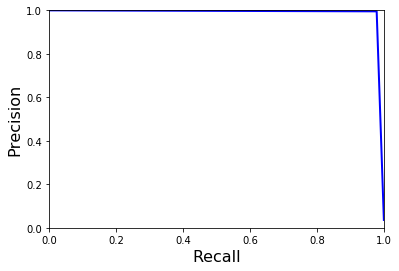

In [23]:
#Naive의 ROC curve그리기
Draw_Roc_curve(Naive,Train_X,Train_Y)

# 8.결과 부분

#### 8-1.각 모델의 결과값을 합친 수에 대해 색을 부여하는 하는 함수

In [24]:
def color_making(number):
    if number == 3:
         return "Red"
    elif number == 2:
        return "Orange"
    elif number == 1:
        return "Yellow"
    elif number == 0:
        return "Green"
    else:
        raise ValueError

#### 8-2.최종 결과 Dataframe을 만드는 함수

In [25]:
def make_result_dataframe(test_data,y_Test):
    color_list = []
    decision_number = 0
    ber_predict = Naive.predict(test_data)
    knn_predict = knn_clf.predict(test_data)
    svm_predict = SVM.predict(test_data)
    predict_list = [ber_predict,knn_predict,svm_predict]
    for i in predict_list:
        decision_number += np.array([x for x in i])
    for number in decision_number:
        color_list.append(color_making(number))
    result = {'bernoulli' : ber_predict,'knn' : knn_predict,"svm" : svm_predict , 'decision_number' : decision_number, "Color" : color_list,
             "real_label" : y_Test}
    result_dataframe = pd.DataFrame(result)
    return result_dataframe

#### 8-3.Main

In [30]:
if __name__ == "__main__":
    result_df = make_result_dataframe(Test_X,Test_Y)
    S1 = np.asarray(result_df["Color"]) == "Red"
    S2 = np.asarray(result_df["Color"]) != "Green"
    print("Red Confusion Matrix : \n",metrics.confusion_matrix(S1,Test_Y))
    print("Green Confusion Matrix : \n",metrics.confusion_matrix(S2,Test_Y))
    print("RED Accuracy : ",accuracy_score(S1,Test_Y))
    print("Green Accurcy : ",accuracy_score(S2,Test_Y))
    result_df.to_excel("final_result.xlsx",encoding = 'utf-8',header = True)

Red Confusion Matrix : 
 [[30838    69]
 [    1  1027]]
Green Confusion Matrix : 
 [[30833     7]
 [    6  1089]]
RED Accuracy :  0.9978080475966807
Green Accurcy :  0.9995929231250978
